In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from math import ceil
from scipy import stats

# Functions

## Exploring measurement time and frequency stability

In [ ]:
def display_time_distribution(df, x):
    """ A function that is designed to display the measurement time distribution using a histogram
    Args:
        1) df - a dataframe that contains a column with measurement time data
        2) x - name of measurement time column
    """
    # Plot the measurement time distribution using seaborn's histogram
    plt.figure(figsize=(15, 6))
    sns.histplot(df[x], bins=60, kde=True, color='blue')
    plt.xlabel('Period, s')
    plt.ylabel('Count')
    plt.title('Measurement Time Distribution')

    plt.show()
    
def get_measurement_time_df(df, column_name='time'):
    """ A function for building a dataframe that contains information about the time of measurement of each reading of the device
    Args:
        1) df - a dataframe that contains a time column
        2) column_name - the name of the column containing time data (in seconds)
    Returns:
        time_measurement_df - dataframe that contains information about the time of measurement of each reading of the device
    """
    period_dict = {'start_time': [], 'end_time': [], 'measurement_time': []}
    prev_time = None
    curr_time = None
    for index, row in df.iterrows():
        if(index == len(df)):
            break
            
        prev_time = curr_time
        curr_time = row[column_name]

        if prev_time != None:
            period_dict['start_time'].append(prev_time)
            period_dict['end_time'].append(curr_time)
            period_dict['measurement_time'].append(curr_time - prev_time)
    
    time_measurement_df = pd.DataFrame.from_dict(period_dict)
    return time_measurement_df


def display_time_distribution(df, x):
    """ A function that is designed to display the measurement time distribution using a histogram
    Args:
        1) df - a dataframe that contains a column with measurement time data
        2) x - name of measurement time column
    """
    # Plot the measurement time distribution using seaborn's histogram
    plt.figure(figsize=(25, 6))
    sns.histplot(df[x], bins=60, kde=True, color='blue')
    plt.xlabel('Period, s')
    plt.ylabel('Count')
    plt.title('Measurement Time Distribution')

    plt.show()


def display_data_collection_stability(df):
    """A function that displays the stability of data collection relative to the time when the measurements were taken and 
       relative to the measurement number
    Args:
        1) df - time_measurement_df
    """
    fig, axes = plt.subplots(2, 1, figsize=(15, 14))
    axes[0].plot(range(len(df[df['lost_data'] == 0])), df[df['lost_data'] == 0]['measurement_time'])
    axes[0].set_title(f'Stability of Data Collection (Filtered)\nAverage frequency: {freq:.3f} Hz')
    axes[0].set_xlabel('number of measurement')
    axes[0].set_ylabel('measurement time')
    
    axes[1].plot(df[df['lost_data'] == 0]['start_time'], df[df['lost_data'] == 0]['measurement_time'])
    axes[1].set_title(f'Stability of Data Collection (Filtered)\nAverage frequency: {freq:.3f} Hz')
    axes[1].set_xlabel('time of measurement')
    axes[1].set_ylabel('measurement time')
    
    plt.show()

## Visualizing results

In [65]:
def display_three_axes(df, y, x=None, title=None, x_label=None, y_label=None, filename=None):
    """ Function for visualization of three axes (X, Y, Z) of the measurement results of the device
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis (for the three lines, this is the same data)
        3) y - the list containing the dataframe column names corresponding to the OX, OY, and OZ axis measurements, respectively
        4) title - title of the graph
        5) x_label - the name of the OX axis of the graph
        6) y_label - the name of the OY axis of the graph
        7) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        Nothing, but plots graph
    """
    plt.figure(figsize=(12, 6))
    if x is None:
        plt.plot(df[y[0]], label='X')
        plt.plot(df[y[1]], label='Y')
        plt.plot(df[y[2]], label='Z')
    else:
        plt.plot(df[x], df[y[0]], label='X')
        plt.plot(df[x], df[y[1]], label='Y', color='orange')
        plt.plot(df[x], df[y[2]], label='Z', color='green')   
         
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## Data Filtering

In [ ]:
def display_raw_filtered_data_zoom(df, x, y, x_lims, y_lims, title=None, x_label=None, y_label=None, filename=None, zoom_axes=None):
    """ Function to display raw and filtered data on the same graph with scaling to better display the filtering
    Args:
        1) df - a dataframe containing the results of the device measurement
        2) x - the name of the column of the dataframe that contains the data for the OX axis of the graph
        3) y - the list containing the column names of the data frame corresponding to the raw and filtered data, respectively, on a given axis (OX, OY, or OZ)
        4) x_lims - the list of limits along the OX axis for zooming ([zoom_xmin; zoom_xmax])
        5) y_lims - the list of limits along the OY axis for zooming ([zoom_ymin; zoom_ymax])
        6) title - title of the graph
        7) x_label - the name of the OX axis of the graph
        8) y_label - the name of the OY axis of the graph
        9) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
        10) zoom_axes - the list containing the placement coordinates (x, y) and dimensions (width, height) of the smaller graph that contains the zoomed-in image for the specified limits (x_lims and y_lims)
            zoom_axes = [x, y, width, height] 
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # inset
    if zoom_axes:
        inset_ax = fig.add_axes(zoom_axes)
    else:
        inset_ax = fig.add_axes([0.25, 0.20, 0.20, 0.20])
    inset_ax.plot(df[x], df[y[0]], label='Raw Data', color='green')
    inset_ax.plot(df[x], df[y[1]], label='Filtered_data', color='orange')
    inset_ax.set_xlim(x_lims[0], x_lims[1])
    inset_ax.set_ylim(y_lims[0], y_lims[1])
    inset_ax.set_title('zoom near origin')
    if filename:
        plt.savefig(f"{filename}.png", bbox_inches='tight')
    plt.show()

## Exploratory Data Analysis

In [ ]:
def display_pie_chart(df, column_name, title=None, filename=None):
    """ Function to display the percentage ratio of column (with the name column_name) content 
    Args:
        1) df - the original dataframe that contains the required information
        2) column_name - the name of the df dataframe column whose percentage values are to be found
        3) title - the title of the graph
        4) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None, but plots graph
    """
    # Calculate the percentage of each activity in original_df
    activity_percentages_df = df[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    plt.pie(activity_percentages_df, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## Windowing

In [ ]:
def windowed_pie_chart(original_df, windowed_df, column, first_chart_title='Original DataFrame', second_chart_title='Windowed DataFrame', filename=None):
    """Function for displaying the ratio of column content between the original dataframe and the windowed dataframe in the form of a pie chart
    Args:
        1) original_df - the original dataframe that contains the required information
        2) windowed_df - a dataframe that contains the results of windowing
        3) column - the name of the dataframe column whose percentage values are to be found
        4) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    Returns:
        None; just builds a pie chart to display the ratio of column contents between the original dataframe and the windowed dataframe
    """
    # Calculate the percentage of each activity in original_df
    activity_percentages_df = original_df[column].value_counts(normalize=True) * 100

    # Calculate the percentage of each activity in windowed_df
    activity_percentages_windowed = windowed_df[column].value_counts(normalize=True) * 100

    # Create subplots for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart for df
    sns.set_palette("Set3")
    axes[0].pie(activity_percentages_df, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    axes[0].set_title(first_chart_title)

    # Plot pie chart for windowed_df
    sns.set_palette("Set3")
    axes[1].pie(activity_percentages_windowed, labels=activity_percentages_df.index, autopct='%1.1f%%', startangle=140)
    axes[1].set_title(second_chart_title)

    # Adjust layout
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## Feature Engineering

In [ ]:
def get_statistical_measures_df(windowed_data_df, functions, data_df_columns, result_df_columns):
    """Function for creating a dataframe X_df, the columns of which correspond to the required statistical measures for the windows of the windowed_data_df dataframe
    Args:
        1) windowed_data_df - a dataframe whose rows contain arrays of data formed as a result of windowing
        2) functions - a list of references to lambda functions that will calculate the required statistical measures
        3) data_df_columns - a list of column names of the windowed_data_df dataframe for which to find statistical measures
        4) result_df_columns - a list of names of the searched statistical measures of the output dataframe
        
    Returns:
        X_train dataframe
        
    An example of using the function:
        Let's imagine we have a windowed_data_df dataframe (a dataframe formed as a result of windowing - that is, each record in a row can be an array of records for a given window), which contains the columns 'accX', 'accY', 'accZ' (the results of measuring the readings of the accelerometer on the corresponding axes). 
        Inside the function, we create an X_df dataframe to which we want to add new columns with statistical measure values.
        For example, we want to calculate the statistical mean and avg absolute diff for the accelerometer readings on all three axes (the columns 'accX', 'accY', 'accZ' of data_df), so the columns of the X_df dataframe will be named, for example, 'accX_mean', 'accY_mean', ..., 'accZ_aad'. 
        These values can be calculated using the lambda functions: [
            lambda x: x.mean(),
            lambda x: np.mean(np.absolute(x - np.mean(x)))
        ]
        So, the function call will look like this:
        get_statistical_measures_df(df=data_df, 
                                    functions=[
                                        lambda x: x.mean(),
                                        lambda x: np.mean(np.absolute(x - np.mean(x)))
                                    ], 
                                    data_df_columns=['accX', 'accY', 'accZ'], 
                                    result_df_columns=['mean', 'aad']) 
    """
    X_df = pd.DataFrame()
    for [function, res_column] in zip(functions, result_df_columns):
        for data_column in data_df_columns:
            X_df[f'{data_column}_{res_column}'] = windowed_data_df[data_column].apply(function)
    return X_df

# Work with train data

In [ ]:
df = pd.read_csv('data/40_Hz/concatenated_data/All/Train_activities_1_2023-08-23.csv')
df.head()

In [ ]:
df.info()

## Data Cleaning and Preprocessing

### We execute the following steps based on the observation:
- drop null values.
- drop the rows where the time is less than 0.
- sort data in ascending order of time if it has not been sorted.

In [ ]:
df.info()

In [ ]:
len(df[df['time']<0])

In [ ]:
# Check if the 'time' column of the dataframe is sorted in ascending order
df['time'].is_monotonic_increasing

## Exploring measurement period and frequency stability

In [ ]:
time_diffs = df['time'].diff()
freq = 1.0 / time_diffs.mean()
print(f"Measurement time = {df.iloc[-1]['time'] - df.iloc[0]['time']} s")
print(f"Number of measurements (number of rows in the data set) = {len(df)}")
print(f"Average measurement period = {time_diffs.mean():.3f} s")
print(f"Average frequency of measurement = {freq:.3f} Hz")

In [ ]:
time_measurement_df = get_measurement_time_df(df)
time_measurement_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
ax.set_ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df['measurement_time'])), 
             y=time_measurement_df['measurement_time'])

inset_axes = fig.add_axes([0.17, 0.35, 0.10, 0.25])
inset_axes.plot(range(len(time_measurement_df['measurement_time'])), 
                time_measurement_df['measurement_time'])
inset_axes.set_title('Zoom near origin')
inset_axes.set_xlim(10, 20)
inset_axes.set_ylim(0.01, 0.04)
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

In [ ]:
time_measurement_df[time_measurement_df['measurement_time'] > 1]

### Delete rows with measurement_time > 0.040

In [ ]:
len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.040])

In [ ]:
df = df[df['time'].diff() <= 0.04]
df.info()

In [ ]:
plt.figure(figsize=(12, 4))
plt.title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
plt.ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.04]['measurement_time'])), 
             y=time_measurement_df[time_measurement_df['measurement_time'] <= 0.04]['measurement_time'])
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

## Data Filtering

### Display data before filtering

In [ ]:
display_three_axes(df=df, x='time', y=['accX', 'accY', 'accZ'], title='Time Dependence of Linear Acceleration (Raw Data)', 
                   x_label='Time, s', y_label='Linear acceleration, m/s^2', filename='graphs/accelerometer')

In [ ]:
display_three_axes(df=df, x='time', y=['gyrX', 'gyrY', 'gyrZ'], title='Time Dependence of Angular Velocity (Raw Data)', 
                   x_label='Time, s', y_label='Angular velocity, rad/s', filename='graphs/gyroscope')

### Display data after filtering

In [ ]:
window_size = 10  # Define the size of the median window

# Apply median filtering to accelerometer data
df['accX_filtered'] = df['accX'].rolling(window=window_size, center=True, min_periods=1).median()
df['accY_filtered'] = df['accY'].rolling(window=window_size, center=True, min_periods=1).median()
df['accZ_filtered'] = df['accZ'].rolling(window=window_size, center=True, min_periods=1).median()

# Apply median filtering to gyroscope data
df['gyrX_filtered'] = df['gyrX'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrY_filtered'] = df['gyrY'].rolling(window=window_size, center=True, min_periods=1).median()
df['gyrZ_filtered'] = df['gyrZ'].rolling(window=window_size, center=True, min_periods=1).median()

df.head(3)

In [ ]:
display_three_axes(df=df, x='time', y=['accX_filtered', 'accY_filtered', 'accZ_filtered'], title='Time Dependence of Linear Acceleration (Filtered Data)', 
                x_label='Time, s', y_label='Linear acceleration, m/s^2')

In [ ]:
display_three_axes(df=df, x='time', y=['gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered'], title='Time Dependence of Angular Velocity (Filtered Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s', filename='graphs/gyroscope')

### Consider the implications of data filtering

#### Display the results of filtering for accelerometer and gyroscope

##### Zoom accelerometer graphs to better see the results of filtering

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accX', 'accX_filtered'], x_lims=[14, 20], y_lims=[-1.5, 1.5],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='Accelerometer OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15],
                               filename='graphs/accX_filtered'
                              )

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accY', 'accY_filtered'], x_lims=[14, 20], y_lims=[-3, 3],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='Accelerometer OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['accZ', 'accZ_filtered'], x_lims=[14, 20], y_lims=[4, 20],
                               x_label='Time, s', y_label='Linear acceleration, m/s^2',
                               title='gForce OX: Raw vs Filtered',
                               zoom_axes = [0.30, 0.65, 0.15, 0.15])

##### Zoom gyroscope graphs to better see the results of filtering

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrX', 'gyrX_filtered'], x_lims=[14, 20], y_lims = [-0.6, 1],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OX: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrY', 'gyrY_filtered'], x_lims=[14, 20], y_lims = [-0.6, 0.75],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OY: Raw vs Filtered',
                               zoom_axes = [0.20, 0.50, 0.15, 0.15])

In [ ]:
display_raw_filtered_data_zoom(df=df, x='time', y=['gyrZ', 'gyrZ_filtered'], x_lims=[14, 20], y_lims = [-1, 1.2],
                               x_label='Time, s', y_label='Angular velocity, rad/s',
                               title='Gyroscope OZ: Raw vs Filtered',
                               zoom_axes = [0.18, 0.18, 0.15, 0.15],
                               filename='graphs/gyrZ_filtered'
                              )

## Exploratory Data Analysis

### Analyzing class label distribution

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

In [ ]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

#### Remove 'No activity' class ('activity' column) from df 

In [ ]:
df.info()

In [ ]:
df = df[df['activity'] != 'No activity']
df.info()

In [ ]:
plt.rcdefaults()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='activity')
plt.title('Number of samples by activity')
plt.show()

In [ ]:
activity_counts = df['activity'].value_counts()
print(activity_counts)

In [ ]:
display_pie_chart(df=df, column_name='activity', title='Class label distribution')

#### Perform undersampling to get a balanced dataframe

In [ ]:
# First, calculate the minimum number of samples across all classes
min_samples = df['activity'].value_counts().min()


# Initialize an empty DataFrame to store the undersampled data
undersampled_df = pd.DataFrame()

# Loop through each unique activity class and select the first min_samples for each class
for activity_class in df['activity'].unique():
    class_subset = df[df['activity'] == activity_class].iloc[:min_samples]
    undersampled_df = pd.concat([undersampled_df, class_subset])

undersampled_df.head()

In [ ]:
undersampled_df.reset_index(inplace=True)
undersampled_df.info()

#### View the labels distribution after undersampling

In [ ]:
activity_counts = undersampled_df['activity'].value_counts()
print(activity_counts)

In [ ]:
plt.rcdefaults()
sns.set_style('whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=undersampled_df, x='activity')
plt.title('Number of samples by activity')
plt.savefig('graphs/countplot.png')
plt.show()

In [ ]:
display_pie_chart(df=undersampled_df, column_name='activity', title='Class label distribution')

### Observe activity-wise distribution of the signal data along x, y and z axes

In [ ]:
undersampled_df.head()

#### Accelerometer

##### accX

In [ ]:
plt.rcdefaults()
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'accX_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/accX_distplot.png', bbox_inches='tight')

##### accY

In [ ]:
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'accY_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/accY_distplot.png', bbox_inches='tight')

##### accZ

In [ ]:
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'accZ_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/accZ_distplot.png', bbox_inches='tight')

#### Gyroscope

##### gyrX

In [ ]:
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'gyrX_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/gyrX_distplot.png', bbox_inches='tight')

##### gyrY

In [ ]:
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'gyrY_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/gyrY_distplot.png', bbox_inches='tight')

##### gyrZ

In [ ]:
sns.FacetGrid(data=undersampled_df, hue='activity', height=10).map(sns.distplot, 'gyrZ_filtered').add_legend()
plt.grid(alpha=0.5)
plt.savefig('graphs/gyrZ_distplot.png', bbox_inches='tight')

### Build a correlation matrix and remove certain axes of the accelerometer or gyroscope

In [ ]:
undersampled_df.drop('index', axis=1, inplace=True)
undersampled_df.head()

In [ ]:
sel_columns = ['time', 'accX_filtered', 'accY_filtered', 'accZ_filtered', 'gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered']

# Extract the selected columns from the DataFrame
selected_data = undersampled_df[sel_columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig('graphs/correlation_matrix.png')
plt.show()

In [ ]:
filtered_columns = ['time', 'accX_filtered', 'accY_filtered', 'accZ_filtered', 'gyrZ_filtered', 'activity']
filtered_df = undersampled_df[filtered_columns]
filtered_df.head()

In [ ]:
filtered_df.info()

## Data Transformation

In [ ]:
# Calculate the number of data points within a 2-second window
sampling_frequency =  1.0 / filtered_df['time'].diff().mean()  # Hz
window_duration = 2 # seconds
window_size = ceil(sampling_frequency * window_duration)
step_size = window_size // 2

# Create a list to store the windowed dataframes
windowed_dfs = []

print(f"window size = {window_size}")

windowed_dict = {'start_time': [], 'end_time': [], 'accX': [], 'accY': [], 'accZ': [], 'gyrZ': [], 'activity': []}
# Divide the entire dataframe into 2-second windows
for i in range(0, len(filtered_df), step_size):
    window_df = filtered_df.iloc[i:i + window_size]
    
    windowed_dict['start_time'].append(window_df['time'].iloc[0])
    windowed_dict['end_time'].append(window_df['time'].iloc[-1])
    windowed_dict['accX'].append(window_df['accX_filtered'].values)
    windowed_dict['accY'].append(window_df['accY_filtered'].values)
    windowed_dict['accZ'].append(window_df['accZ_filtered'].values)
    
    windowed_dict['gyrZ'].append(window_df['gyrZ_filtered'].values)
    
    # Determine the most frequent activity in the window
    most_frequent_activity = window_df['activity'].value_counts().idxmax()
    label = stats.mode(filtered_df['activity'][i: i + window_size])[0][0]
    if label != most_frequent_activity:
        print("label != most_frequent_activity")
        print(f'most_frequent_activity = {most_frequent_activity}')
        print(f'label = {label}')
        break
    # Assign the most frequent activity to all rows in the window
    windowed_dict['activity'].append(most_frequent_activity)
    
    windowed_dfs.append(window_df)

windowed_df = pd.DataFrame.from_dict(windowed_dict)
print(f"len(windowed_dfs) = {len(windowed_dfs)}")
print(f"len(windowed_df) = {len(windowed_df)}")

In [ ]:
sampling_frequency =  1.0 / filtered_df['time'].diff().mean()  # Hz
print(f"sampling_frequency = {sampling_frequency: .3f} Hz")

In [ ]:
windowed_df.head()

In [ ]:
windowed_df.info()

In [ ]:
windowed_df[-1:]

In [ ]:
print(f'len(filtered_df) = {len(filtered_df)}')
print(f'len(windowed_df) = {len(windowed_df)}')

### View the results of windowing

In [ ]:
sns.set_palette("Set3")
windowed_pie_chart(original_df=filtered_df, windowed_df=windowed_df, column='activity')

## Feature Engineering

#### In the stage 1 of the feature engineering, we will build a total of 12 simple statistical features
1. mean
2. standard deviation
3. average absolute deviation
4. minimum value
5. maximum value
6. difference of maximum and minimum values
7. median
8. interquartile range
9. negative values count
10. positive values count
11. skewness = assymetry
12. kurtosis

In [ ]:
windowed_df.head(2)

In [ ]:
functions_list = [
    lambda x: x.mean(), # mean
    lambda x: x.std(),  # std deviation 
    lambda x: np.mean(np.absolute(x - np.mean(x))), # avg absolute diff
    lambda x: x.min(), # min
    lambda x: x.max(), # max
    lambda x: x.max() - x.min(), # range = max-min diff
    lambda x: np.median(x), # median
    lambda x: np.percentile(x, 75) - np.percentile(x, 25), # interquartile range
    lambda x: np.sum(x < 0), # negative count
    lambda x: np.sum(x > 0), # positive count
    lambda x: stats.skew(x), # skewness = assymetry
    lambda x: stats.kurtosis(x) # kurtosis
]

In [ ]:
X_train = get_statistical_measures_df(windowed_data_df=windowed_df, 
                                      functions=functions_list, 
                                      data_df_columns=['accX', 'accY', 'accZ', 'gyrZ'], 
                                      result_df_columns=['mean', 'std', 'aad', 'min', 'max', 'range', 'median', 'iqr', 'neg_count', 'pos_count', 'assymetry', 'kurtosis'])

y_train = windowed_df['activity'].values
X_train.head()

In [ ]:
X_train.info()

In [ ]:
y_train[:5]

In [ ]:
print(f"len(X_train) = {len(X_train)}")
print(f"len(y_train) = {len(y_train)}")

# Work with test data

In [57]:
test_df = pd.read_csv('data/40_Hz/concatenated_data/All/Test_activities_1_2023-08-23.csv')
test_df.head()

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity
0,1692513112541,0.000,0.18195,-0.01395,9.904051,0.024200,0.000550,-0.067650,No activity
1,1692513112574,0.033,0.18495,0.09000,9.717000,0.009487,-0.031213,0.028325,No activity
2,1692513112599,0.058,0.18495,0.14505,9.745951,-0.002475,-0.047575,0.090338,No activity
3,1692513112631,0.090,0.14400,0.13605,9.772051,0.003438,-0.046887,0.097488,No activity
4,1692513112660,0.119,0.17505,0.06195,10.002001,0.017600,-0.039600,0.078238,No activity


In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  12557 non-null  int64  
 1   time       12557 non-null  float64
 2   accX       12557 non-null  float64
 3   accY       12557 non-null  float64
 4   accZ       12557 non-null  float64
 5   gyrX       12557 non-null  float64
 6   gyrY       12557 non-null  float64
 7   gyrZ       12557 non-null  float64
 8   activity   12557 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 883.0+ KB


## Exploring measurement period and frequency stability

In [ ]:
time_diffs = test_df['time'].diff()
freq = 1.0 / time_diffs.mean()
print(f"Measurement time = {test_df.iloc[-1]['time'] - test_df.iloc[0]['time']} s")
print(f"Number of measurements (number of rows in the data set) = {len(test_df)}")
print(f"Average measurement period = {time_diffs.mean():.3f} s")
print(f"Average frequency of measurement = {freq:.3f} Hz")

In [ ]:
time_measurement_df = get_measurement_time_df(test_df)
time_measurement_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title(f'Stability of Data Collection (Raw Data)\nAverage frequency: {freq:.3f} Hz')
ax.set_ylabel('measurement time, s')
sns.lineplot(x=range(len(time_measurement_df['measurement_time'])), 
             y=time_measurement_df['measurement_time'])
plt.savefig('graphs/train_data_collection_stability.png')
plt.show()

In [ ]:
len(time_measurement_df[time_measurement_df['measurement_time'] <= 0.040])

In [ ]:
len(test_df[test_df['time'].diff() > 0.040])

## Data Filtering

### Display data before filtering

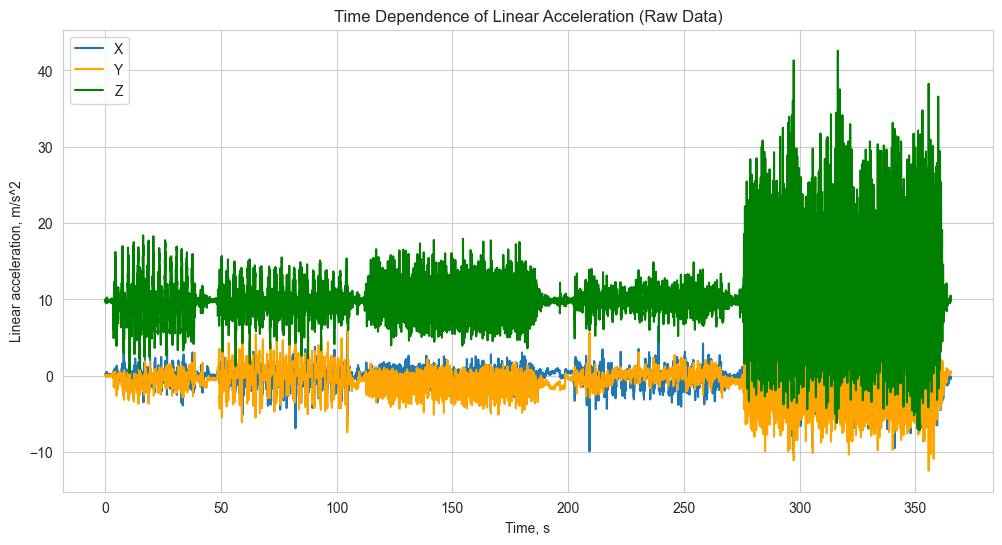

In [41]:
display_three_axes(df=test_df, x='time', y=['accX', 'accY', 'accZ'], title='Time Dependence of Linear Acceleration (Raw Data)', 
                   x_label='Time, s', y_label='Linear acceleration, m/s^2', filename='graphs/accelerometer')

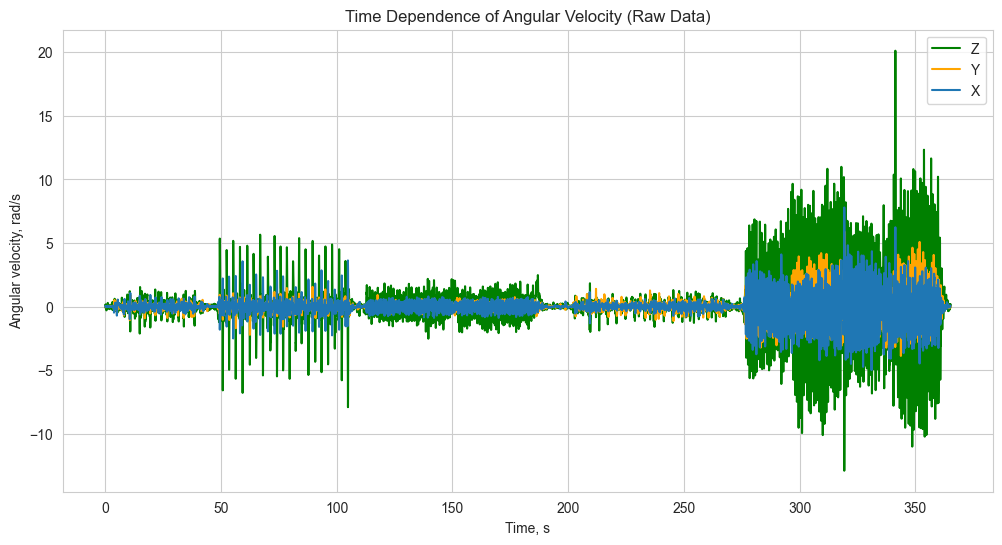

In [45]:
display_three_axes(df=test_df, x='time', y=['gyrX', 'gyrY', 'gyrZ'], title='Time Dependence of Angular Velocity (Raw Data)', 
                   x_label='Time, s', y_label='Angular velocity, rad/s', filename='graphs/gyroscope')

### Display data after filtering

In [59]:
window_size = 10  # Define the size of the median window

# Apply median filtering to accelerometer data
test_df['accX_filtered'] = test_df['accX'].rolling(window=window_size, center=True, min_periods=1).median()
test_df['accY_filtered'] = test_df['accY'].rolling(window=window_size, center=True, min_periods=1).median()
test_df['accZ_filtered'] = test_df['accZ'].rolling(window=window_size, center=True, min_periods=1).median()

# Apply median filtering to gyroscope data
test_df['gyrX_filtered'] = test_df['gyrX'].rolling(window=window_size, center=True, min_periods=1).median()
test_df['gyrY_filtered'] = test_df['gyrY'].rolling(window=window_size, center=True, min_periods=1).median()
test_df['gyrZ_filtered'] = test_df['gyrZ'].rolling(window=window_size, center=True, min_periods=1).median()

test_df.head(3)

,timestamp,time,accX,accY,accZ,gyrX,gyrY,gyrZ,activity,accX_filtered,accY_filtered,accZ_filtered,gyrX_filtered,gyrY_filtered,gyrZ_filtered
0,1692513112541,0.000,0.18195,-0.01395,9.904051,0.024200,0.000550,-0.067650,No activity,0.18195,0.090000,9.772051,0.009487,-0.039600,0.078238
1,1692513112574,0.033,0.18495,0.09000,9.717000,0.009487,-0.031213,0.028325,No activity,0.18345,0.080475,9.838051,0.013544,-0.035406,0.084288
2,1692513112599,0.058,0.18495,0.14505,9.745951,-0.002475,-0.047575,0.090338,No activity,0.18495,0.070950,9.871051,0.017600,-0.031213,0.090338


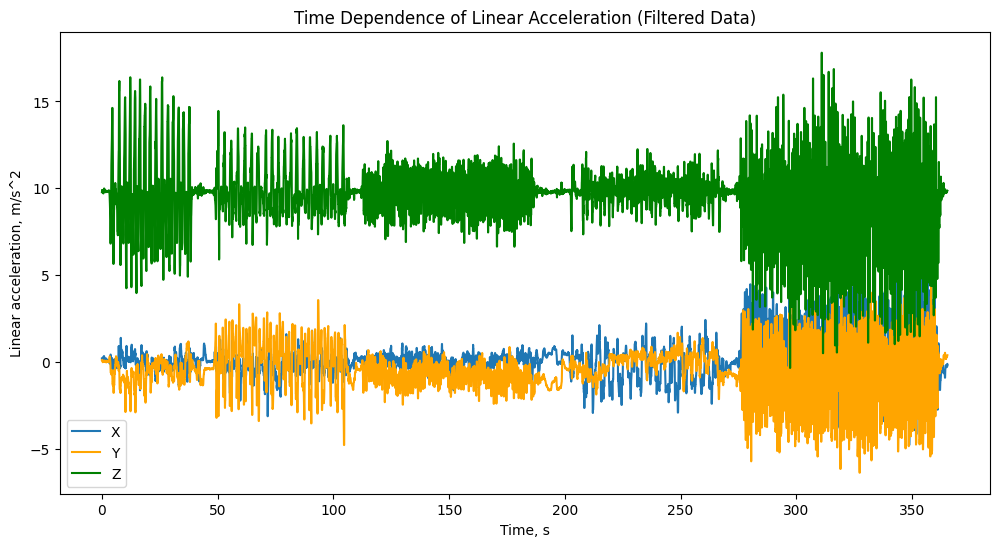

In [62]:
plt.rcdefaults()
display_three_axes(df=test_df, x='time', y=['accX_filtered', 'accY_filtered', 'accZ_filtered'], title='Time Dependence of Linear Acceleration (Filtered Data)', 
                x_label='Time, s', y_label='Linear acceleration, m/s^2', filename='graphs/accelerometer')

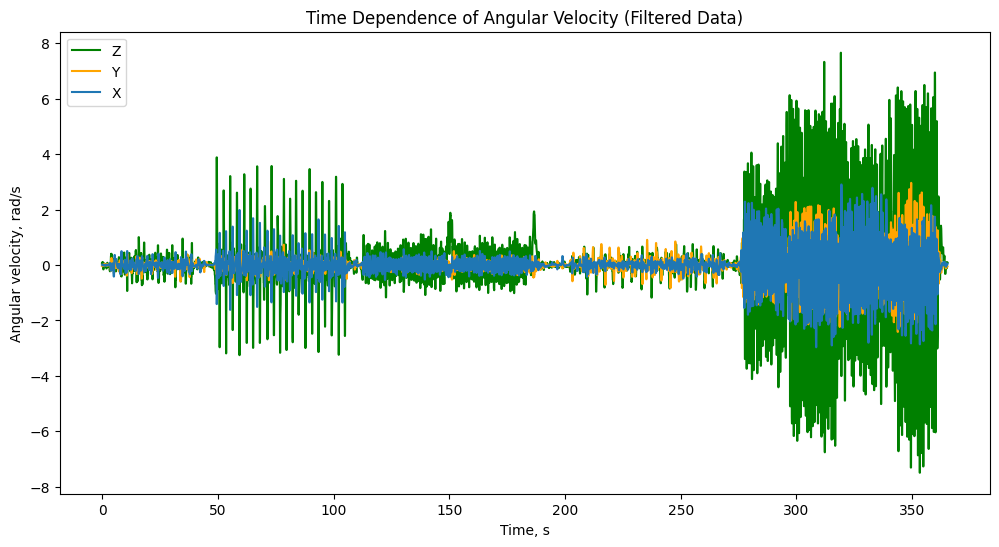

In [64]:
display_three_axes(df=test_df, x='time', y=['gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered'], title='Time Dependence of Angular Velocity (Filtered Data)', 
                x_label='Time, s', y_label='Angular velocity, rad/s', filename='graphs/gyroscope')

## Exploratory Data Analysis

### Analyzing class label distribution

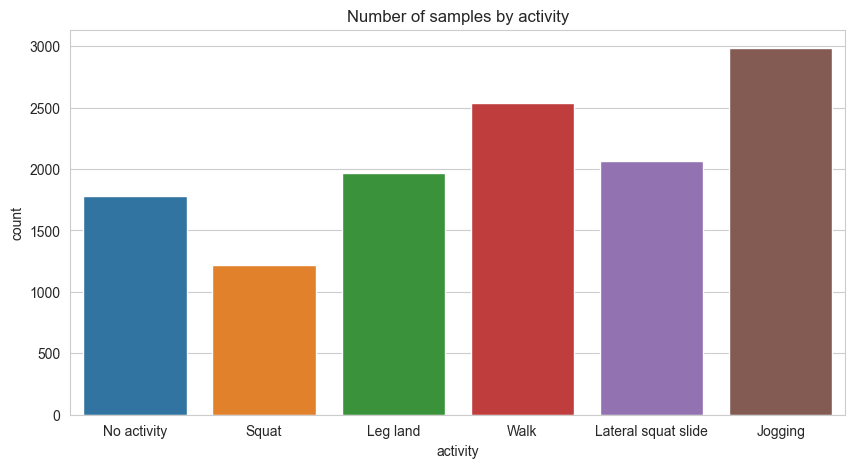

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=test_df, x='activity')
plt.title('Number of samples by activity')
plt.savefig('graphs/test_countplot.png')
plt.show()

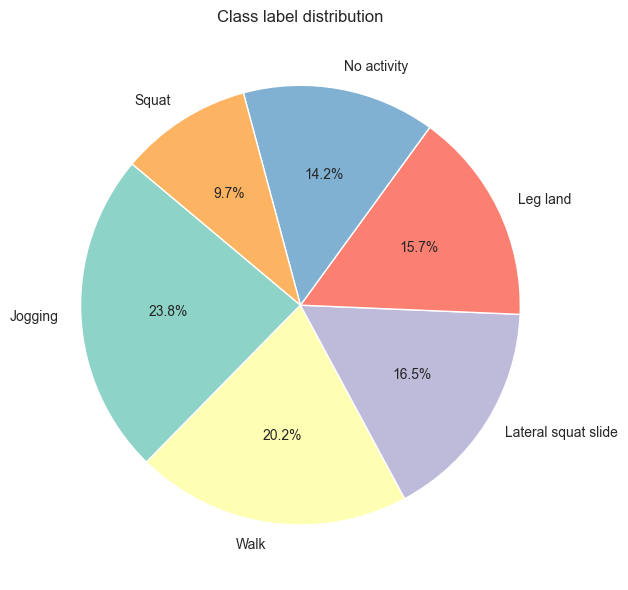

In [70]:
display_pie_chart(df=test_df, column_name='activity', title='Class label distribution')

#### Remove 'No activity' class ('activity' column) from test_df 

In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      12557 non-null  int64  
 1   time           12557 non-null  float64
 2   accX           12557 non-null  float64
 3   accY           12557 non-null  float64
 4   accZ           12557 non-null  float64
 5   gyrX           12557 non-null  float64
 6   gyrY           12557 non-null  float64
 7   gyrZ           12557 non-null  float64
 8   activity       12557 non-null  object 
 9   accX_filtered  12557 non-null  float64
 10  accY_filtered  12557 non-null  float64
 11  accZ_filtered  12557 non-null  float64
 12  gyrX_filtered  12557 non-null  float64
 13  gyrY_filtered  12557 non-null  float64
 14  gyrZ_filtered  12557 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 1.4+ MB


In [72]:
test_df = test_df[test_df['activity'] != 'No activity']
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 114 to 12435
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      10775 non-null  int64  
 1   time           10775 non-null  float64
 2   accX           10775 non-null  float64
 3   accY           10775 non-null  float64
 4   accZ           10775 non-null  float64
 5   gyrX           10775 non-null  float64
 6   gyrY           10775 non-null  float64
 7   gyrZ           10775 non-null  float64
 8   activity       10775 non-null  object 
 9   accX_filtered  10775 non-null  float64
 10  accY_filtered  10775 non-null  float64
 11  accZ_filtered  10775 non-null  float64
 12  gyrX_filtered  10775 non-null  float64
 13  gyrY_filtered  10775 non-null  float64
 14  gyrZ_filtered  10775 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 1.3+ MB


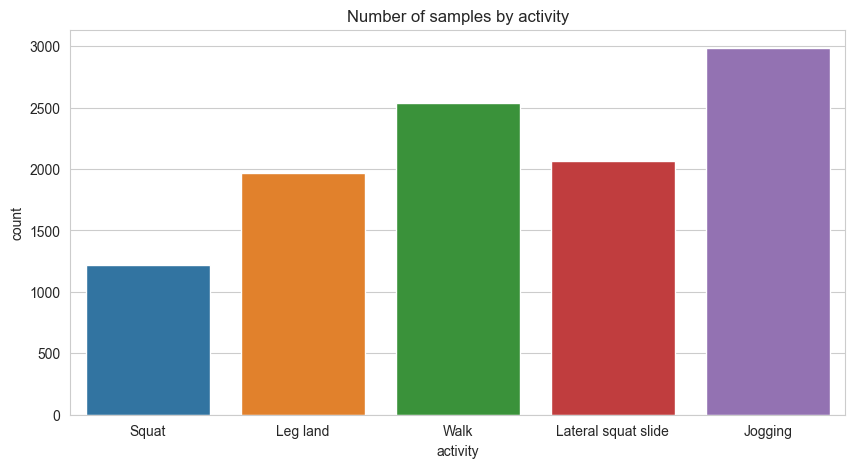

In [73]:
plt.rcdefaults()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.countplot(data=test_df, x='activity')
plt.title('Number of samples by activity')
plt.savefig('graphs/test_countplot.png')
plt.show()

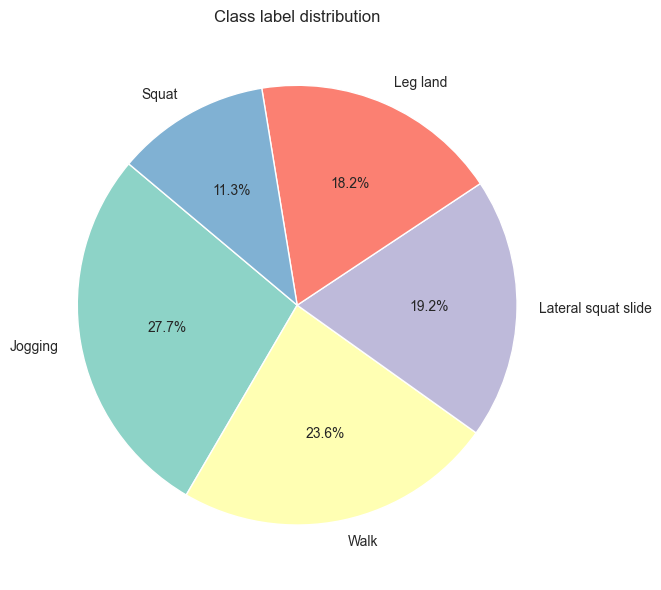

In [74]:
display_pie_chart(df=test_df, column_name='activity', title='Class label distribution', filename='graphs/test_pie_chart')

In [75]:
activity_counts = test_df['activity'].value_counts()
print(activity_counts)

Jogging                2984
Walk                   2538
Lateral squat slide    2068
Leg land               1966
Squat                  1219
Name: activity, dtype: int64


### Build a correlation matrix and remove certain axes of the accelerometer or gyroscope

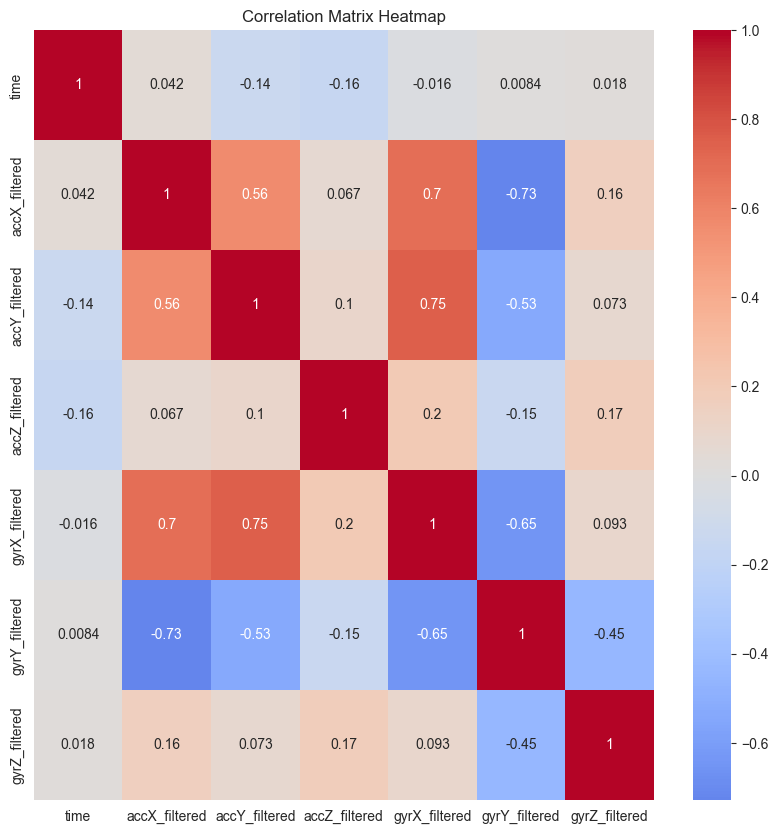

In [77]:
sel_columns = ['time', 'accX_filtered', 'accY_filtered', 'accZ_filtered', 'gyrX_filtered', 'gyrY_filtered', 'gyrZ_filtered']

# Extract the selected columns from the DataFrame
selected_data = test_df[sel_columns]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [78]:
test_filtered_columns = ['time', 'accX_filtered', 'accY_filtered', 'accZ_filtered', 'gyrZ_filtered', 'activity']
test_filtered_df = test_df[filtered_columns]
test_filtered_df.head()

,time,accX_filtered,accY_filtered,accZ_filtered,gyrZ_filtered,activity
114,3.253,-0.071475,0.216975,9.744976,-0.173387,Squat
115,3.281,-0.078525,0.224475,9.705526,-0.194769,Squat
116,3.309,-0.092025,0.261450,9.620550,-0.207075,Squat
117,3.335,-0.092025,0.311475,9.543000,-0.210994,Squat
118,3.365,-0.110025,0.311475,9.462450,-0.217250,Squat


In [79]:
test_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10775 entries, 114 to 12435
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           10775 non-null  float64
 1   accX_filtered  10775 non-null  float64
 2   accY_filtered  10775 non-null  float64
 3   accZ_filtered  10775 non-null  float64
 4   gyrZ_filtered  10775 non-null  float64
 5   activity       10775 non-null  object 
dtypes: float64(5), object(1)
memory usage: 589.3+ KB


## Data Transformation

In [80]:
# Calculate the number of data points within a 2-second window
sampling_frequency =  1.0 / test_filtered_df['time'].diff().mean()  # Hz
window_duration = 2 # seconds
window_size = ceil(sampling_frequency * window_duration)
step_size = window_size // 2

# Create a list to store the windowed dataframes
windowed_dfs = []

print(f"window size = {window_size}")
print(f"sampling_frequency = {sampling_frequency:.3f} Hz")

windowed_dict = {'start_time': [], 'end_time': [], 'accX': [], 'accY': [], 'accZ': [], 'gyrZ': [], 'activity': []}
# Divide the entire dataframe into 2-second windows
for i in range(0, len(test_filtered_df), step_size):
    window_df = test_filtered_df.iloc[i:i + window_size]
    
    windowed_dict['start_time'].append(window_df['time'].iloc[0])
    windowed_dict['end_time'].append(window_df['time'].iloc[-1])
    windowed_dict['accX'].append(window_df['accX_filtered'].values)
    windowed_dict['accY'].append(window_df['accY_filtered'].values)
    windowed_dict['accZ'].append(window_df['accZ_filtered'].values)
    
    windowed_dict['gyrZ'].append(window_df['gyrZ_filtered'].values)
    
    # Determine the most frequent activity in the window
    most_frequent_activity = window_df['activity'].value_counts().idxmax()
    label = stats.mode(test_filtered_df['activity'][i: i + window_size])[0][0]
    if label != most_frequent_activity:
        print("label != most_frequent_activity")
        print(f'most_frequent_activity = {most_frequent_activity}')
        print(f'label = {label}')
        break
    # Assign the most frequent activity to all rows in the window
    windowed_dict['activity'].append(most_frequent_activity)
    
    windowed_dfs.append(window_df)

test_windowed_df = pd.DataFrame.from_dict(windowed_dict)
print(f"len(windowed_dfs) = {len(windowed_dfs)}")
print(f"len(test_windowed_df) = {len(test_windowed_df)}")

window size = 61
len(windowed_dfs) = 360
len(test_windowed_df) = 360


In [83]:
test_windowed_df.head()

,start_time,end_time,accX,accY,accZ,gyrZ,activity
0,3.253,5.085,"[-0.071475, -0.078525, -0.092025003, -0.092025...","[0.21697501, 0.22447501, 0.261450015, 0.311475...","[9.744976000000001, 9.7055255, 9.6205500000000...","[-0.1733875, -0.19476875, -0.207075, -0.210993...",Squat
1,4.154,5.977,"[-0.40005003, -0.28852502, -0.179475005, 0.072...","[-0.7189500200000001, -0.65895002, -0.62895002...","[11.9400005, 11.9400005, 12.252526, 12.4200005...","[0.38218125000000003, 0.38218125000000003, 0.3...",Squat
2,5.085,6.855,"[0.098025, -0.113475, -0.113475, -0.113475, 0....","[-1.7925000999999998, -1.6595251, -1.4900251, ...","[6.83197545, 7.1180255500000005, 7.1985004, 8....","[0.191399995, 0.191399995, 0.191399995, 0.1913...",Squat
3,5.977,7.738,"[-0.087525005, -0.13897501, -0.17850001, -0.20...","[0.232500005, 0.232500005, 0.24547501500000002...","[9.849000499999999, 9.927975, 9.927975, 9.702,...","[-0.21725, -0.21725, -0.21725, -0.18830625, -0...",Squat
4,6.855,8.608,"[0.0365250015, -0.0315000035, -0.0815250065, -...","[-0.14452500499999998, -0.086025006, -0.014550...","[7.28895015, 7.28895015, 7.9399505, 8.640001, ...","[-0.09570000000000001, -0.09570000000000001, -...",Squat


In [84]:
test_windowed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_time  360 non-null    float64
 1   end_time    360 non-null    float64
 2   accX        360 non-null    object 
 3   accY        360 non-null    object 
 4   accZ        360 non-null    object 
 5   gyrZ        360 non-null    object 
 6   activity    360 non-null    object 
dtypes: float64(2), object(5)
memory usage: 19.8+ KB


In [86]:
test_windowed_df[-1:]

,start_time,end_time,accX,accY,accZ,gyrZ,activity
359,361.538,361.647,"[-0.726, -0.915450025, -1.173000075, -1.173000...","[0.21547500000000003, 0.371475, 0.369525004999...","[11.513549999999999, 11.513549999999999, 11.51...","[1.99753125, 1.39033125, 0.37571875, -0.049775...",Jogging


In [88]:
print(f'len(test_filtered_df) = {len(test_filtered_df)}')
print(f'len(test_windowed_df) = {len(test_windowed_df)}')

len(test_filtered_df) = 10775
len(test_windowed_df) = 360


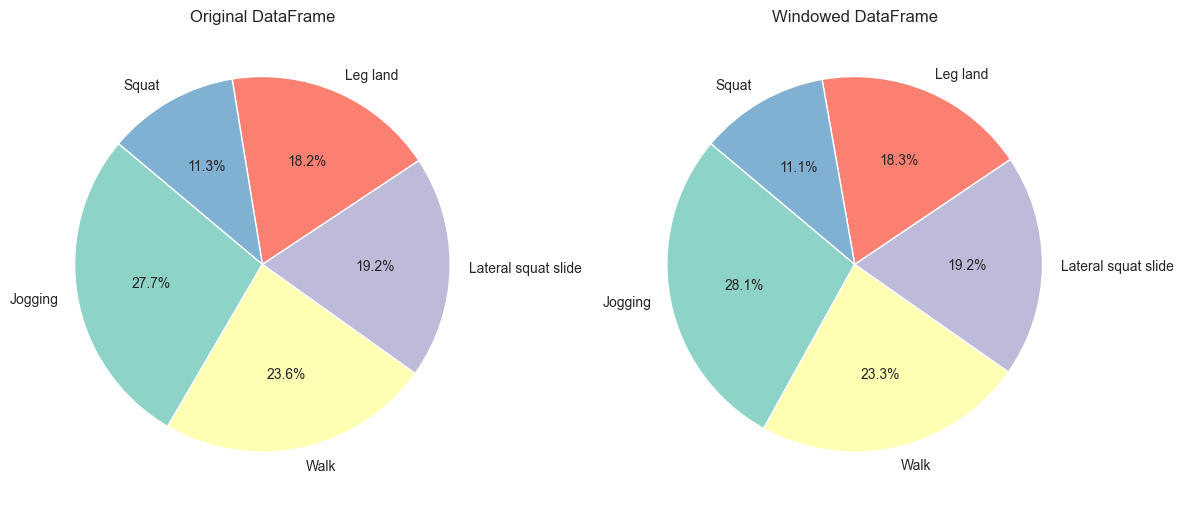

In [89]:
sns.set_palette("Set3")
windowed_pie_chart(original_df=test_filtered_df, windowed_df=test_windowed_df, column='activity')

## Feature Engineering

In [91]:
X_test = get_statistical_measures_df(windowed_data_df=test_windowed_df, 
                                     functions=functions_list, 
                                     data_df_columns=['accX', 'accY', 'accZ', 'gyrZ'], 
                                     result_df_columns=['mean', 'std', 'aad', 'min', 'max', 'range', 'median', 'iqr', 'neg_count', 'pos_count', 'assymetry', 'kurtosis'])

y_test = test_windowed_df['activity'].values
X_test.head()

,accX_mean,accY_mean,accZ_mean,gyrZ_mean,accX_std,accY_std,accZ_std,gyrZ_std,accX_aad,accY_aad,...,accZ_pos_count,gyrZ_pos_count,accX_assymetry,accY_assymetry,accZ_assymetry,gyrZ_assymetry,accX_kurtosis,accY_kurtosis,accZ_kurtosis,gyrZ_kurtosis
0,-0.150695,-0.657400,10.014212,0.085439,0.315760,0.598989,2.765805,0.218151,0.275360,0.470228,...,61,40,0.172701,-0.022567,0.225647,-0.067344,-1.180752,-0.849210,-1.101699,-1.438608
1,-0.205195,-0.864887,10.216321,0.051053,0.256426,0.546921,2.614788,0.162519,0.226416,0.481019,...,61,34,-0.068822,0.163635,0.128496,0.190845,-1.316665,-1.031321,-0.815560,-0.960893
2,-0.195125,-0.312677,9.114502,-0.030522,0.176494,0.580346,0.923041,0.110257,0.136129,0.465185,...,61,22,-0.200145,-1.038471,-0.994637,0.209813,-0.188832,-0.100558,-0.212936,-0.281949
3,0.045037,-0.215254,10.665792,0.036577,0.350643,0.488538,2.656875,0.125370,0.273218,0.344392,...,61,37,1.138782,-1.529475,0.795849,0.152785,0.471938,1.656329,-0.561226,-0.349502
4,0.325499,-0.878630,10.369978,-0.047531,0.403233,0.574996,3.040613,0.214552,0.333493,0.502883,...,61,27,0.356509,0.122926,0.399462,-0.377932,-0.626113,-1.365100,-0.797630,-0.904405


In [93]:
y_test[:5]

array(['Squat', 'Squat', 'Squat', 'Squat', 'Squat'], dtype=object)

In [94]:
print(f"len(X_test) = {len(X_test)}")
print(f"len(y_test) = {len(y_test)}")

len(X_test) = 360
len(y_test) = 360


# Train NN model